# This Notebook is based on the Seurat vignettes for spatial datasets

In [1]:
install.packages("Seurat")
devtools::install_github('satijalab/seurat-data')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘cpp11’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘Rcpp’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘shiny’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’





cli (3.6.1 -> 3.6.2) [CRAN]


Installing 1 packages: cli

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmprE14Hv/remotes34b531eff02/satijalab-seurat-data-4dc08e0/DESCRIPTION’ ... OK
* preparing ‘SeuratData’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SeuratData_0.2.2.9001.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(Seurat)
library(SeuratData)
library(ggplot2)
library(patchwork)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
InstallData("stxBrain")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
brain <- LoadData("stxBrain", type = "anterior1")

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay Spatial changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in Spatial

Updating slots in anterior1

Validating object structure for Assay ‘Spatial’

Validating object structure for VisiumV1 ‘anterior1’

Object representation is consistent with the most current Seurat version





---

# 1- Preprocessing

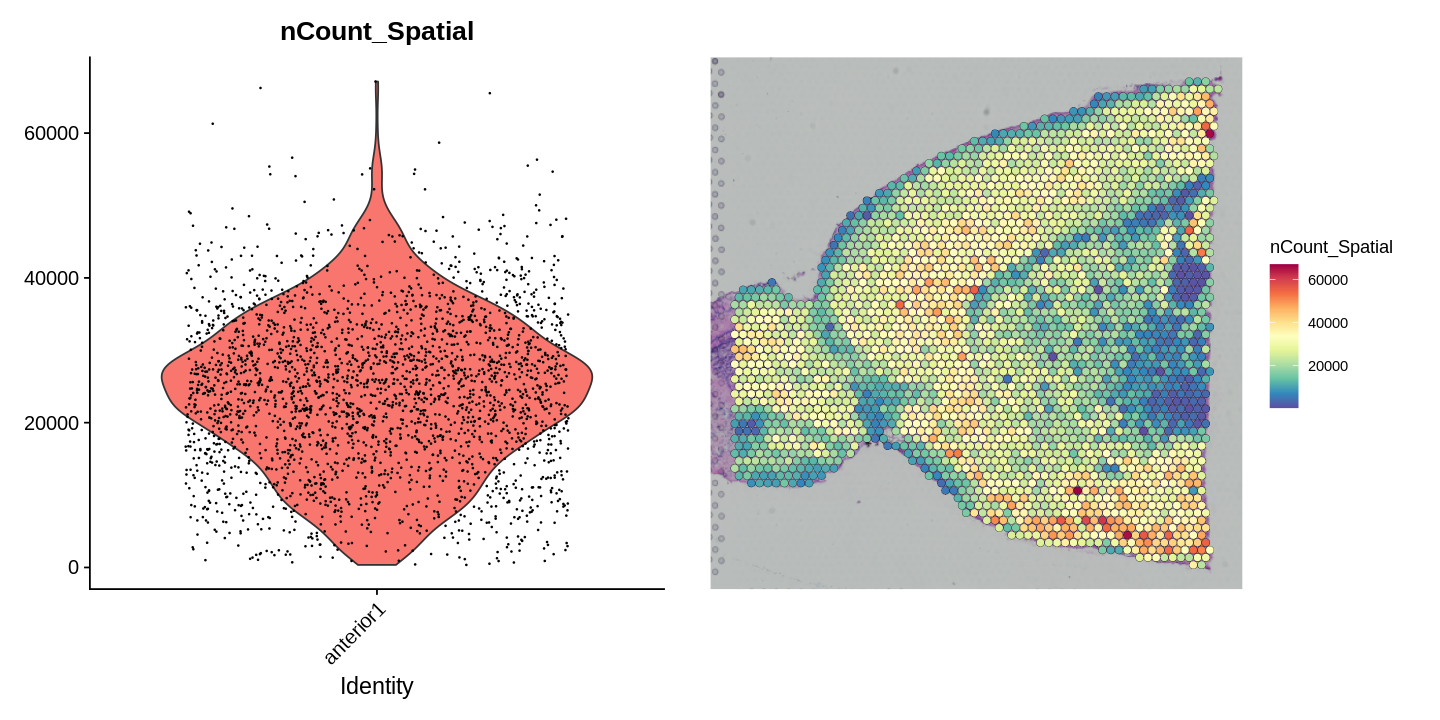

In [5]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot1 <- VlnPlot(brain, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(brain, features = "nCount_Spatial") + theme(legend.position = "right")
wrap_plots(plot1, plot2)

In [6]:
# sctransform normalization
brain <- SCTransform(brain, assay = "Spatial", verbose = FALSE)

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in glm.nb(formula = as.formula(new_formula), data = data):
“alternation limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limi

[1] "Hpca is a hippocampus marker and Ttr is a marker of the choroid plexus."


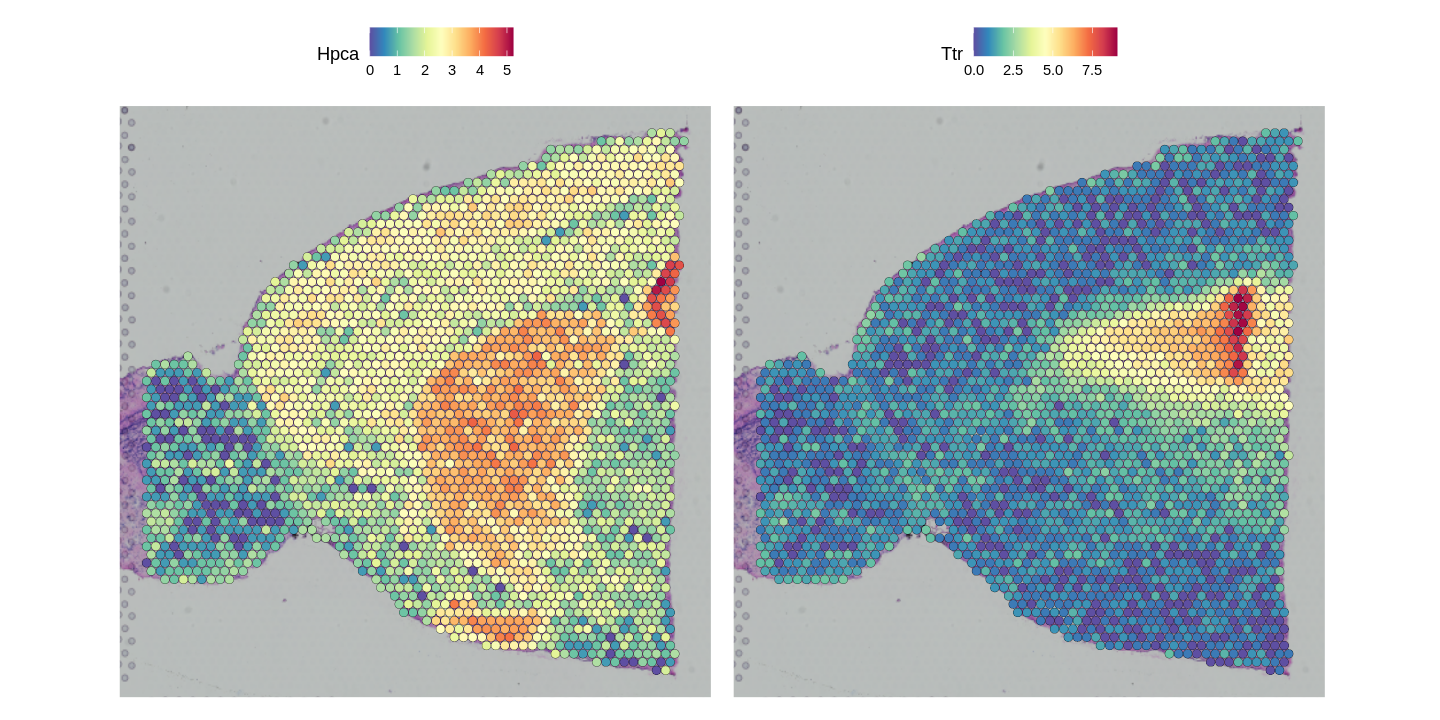

In [17]:
SpatialFeaturePlot(brain, features = c("Hpca", "Ttr"))
print("Hpca is a hippocampus marker and Ttr is a marker of the choroid plexus.")

pt.size.factor- This will scale the size of the spots. Default is 1.6

alpha - minimum and maximum transparency. Default is c(1, 1).

Try setting to alpha c(0.1, 1), to downweight the transparency of points with lower expression

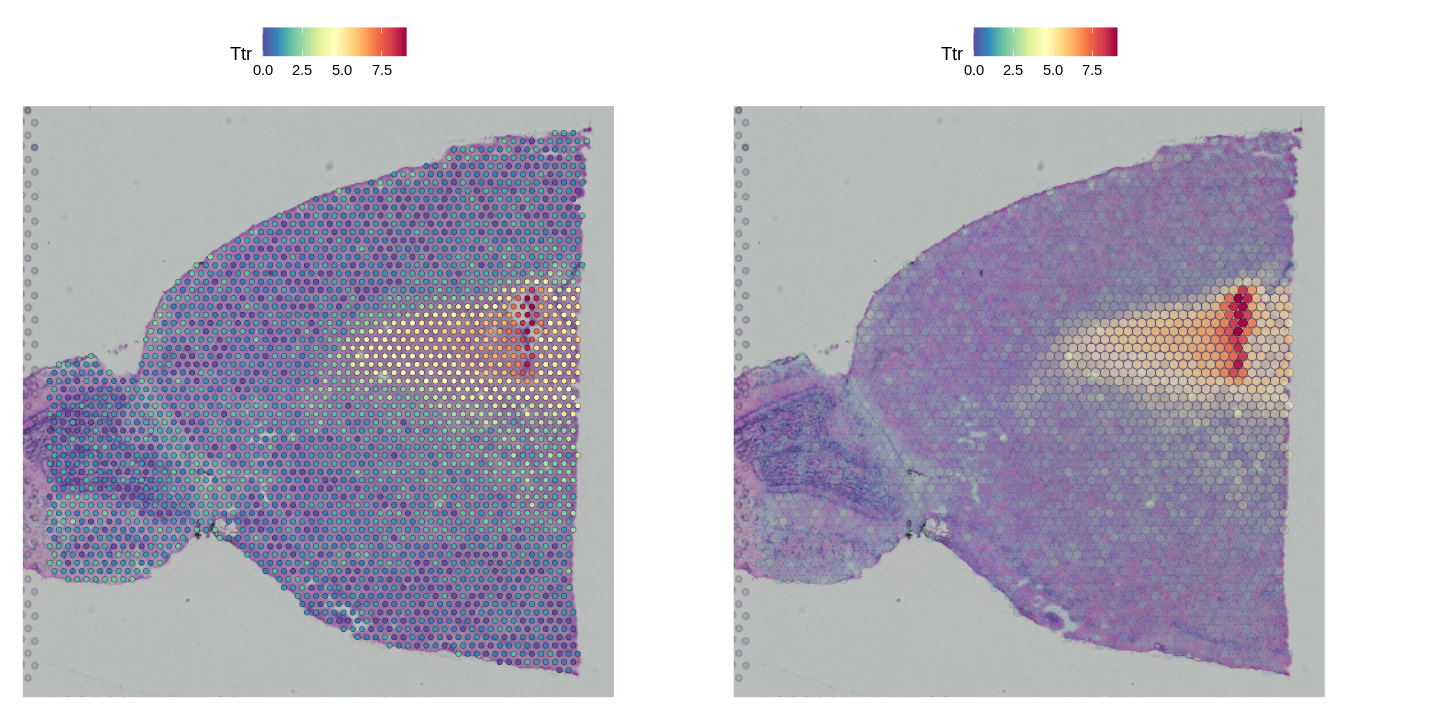

In [19]:
p1 <- SpatialFeaturePlot(brain, features = "Ttr", pt.size.factor = 1)
p2 <- SpatialFeaturePlot(brain, features = "Ttr", alpha = c(0.1, 1))
p1 + p2



---


# 2-Dimensionality reduction, clustering, and visualization

In [7]:
brain <- RunPCA(brain, assay = "SCT", verbose = FALSE)
brain <- FindNeighbors(brain, reduction = "pca", dims = 1:30)
brain <- FindClusters(brain, verbose = FALSE)
brain <- RunUMAP(brain, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
04:39:13 UMAP embedding parameters a = 0.9922 b = 1.112

04:39:13 Read 2696 rows and found 30 numeric columns

04:39:13 Using Annoy for neighbor search, n_neighbors = 30

04:39:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:39:13 Writing NN index file to temp file /tmp/RtmprE14Hv/file34b7df2475e

04:39:13 Searching Annoy index using 1 thread, search_k = 3000

04:39:14 Annoy recall = 100%

04:39:14 Commencing smooth kNN distance calib

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


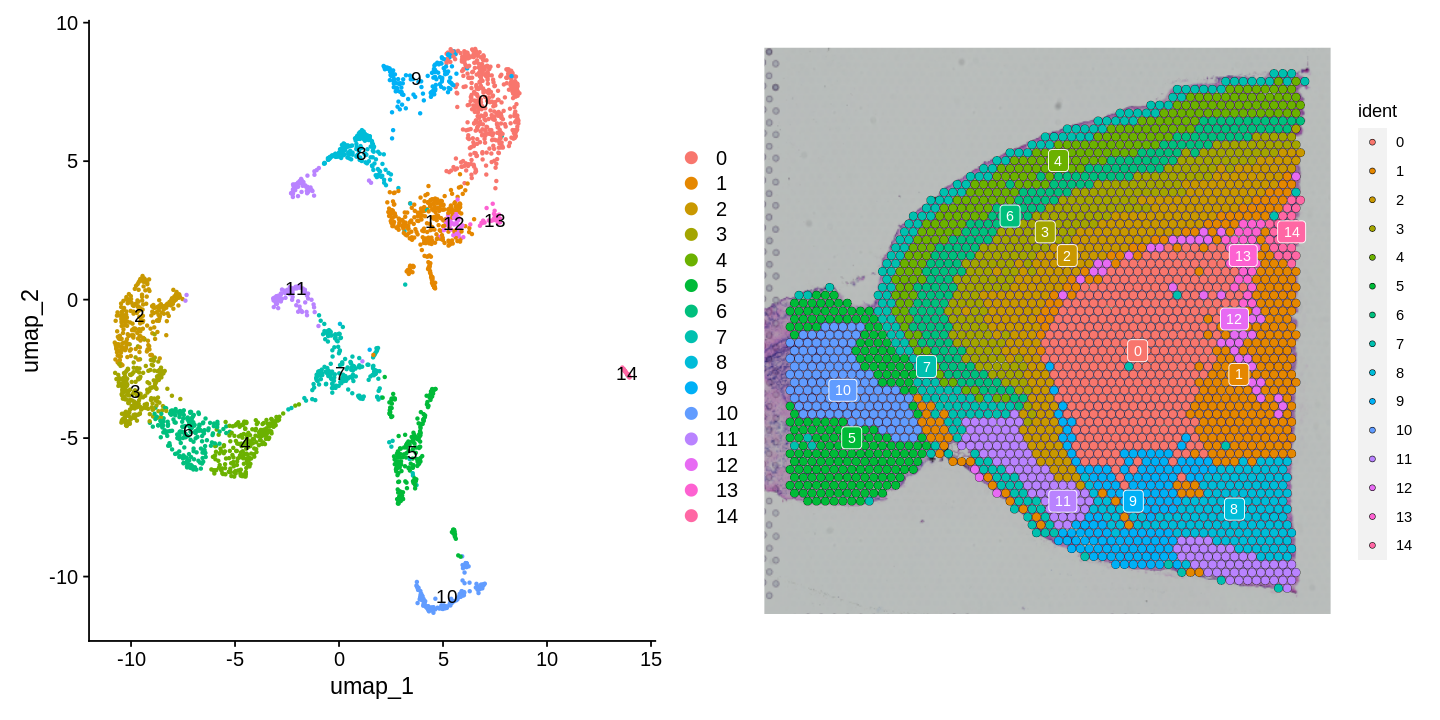

In [8]:
p1 <- DimPlot(brain, reduction = "umap", label = TRUE)
p2 <- SpatialDimPlot(brain, label = TRUE, label.size = 3)
p1 + p2

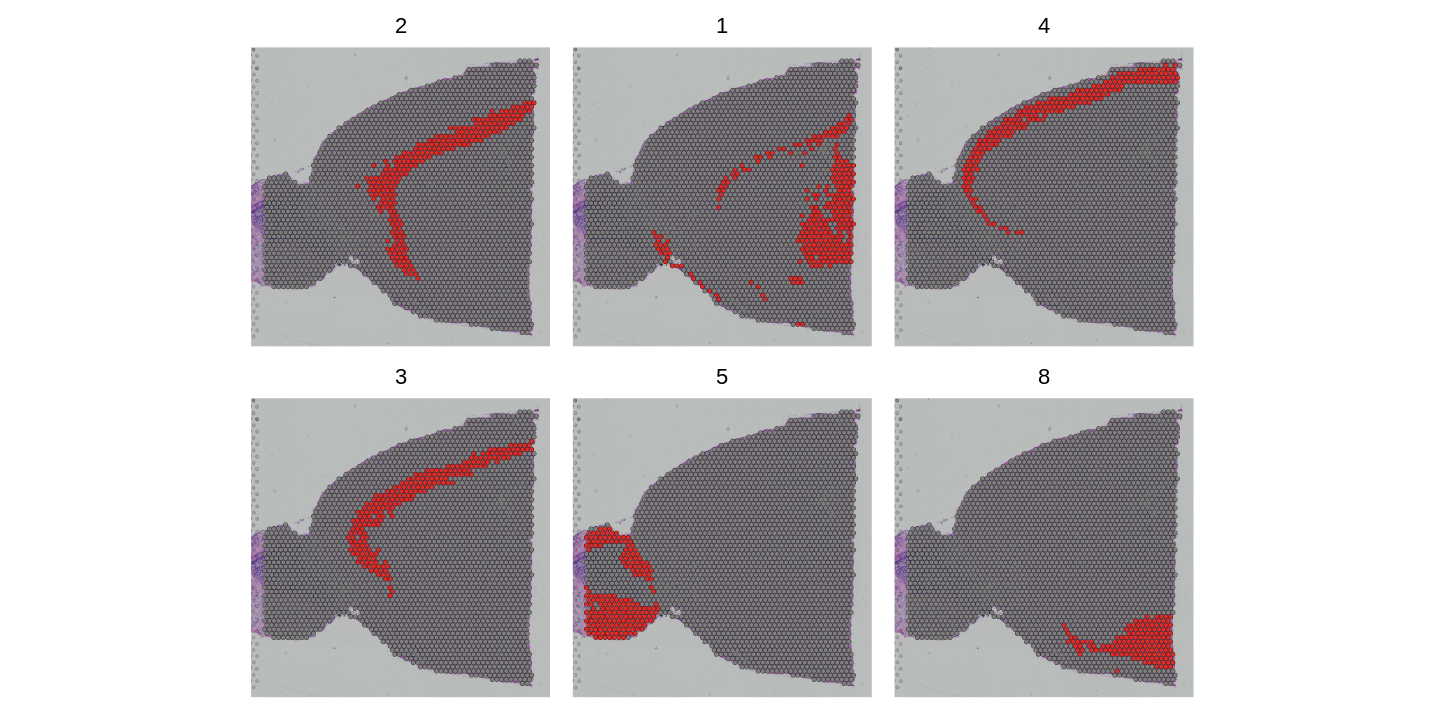

In [22]:
SpatialDimPlot(brain, cells.highlight = CellsByIdentities(object = brain, idents = c(2, 1, 4, 3,
    5, 8)), facet.highlight = TRUE, ncol = 3)



---

# 3- Identification of Spatially Variable Features

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



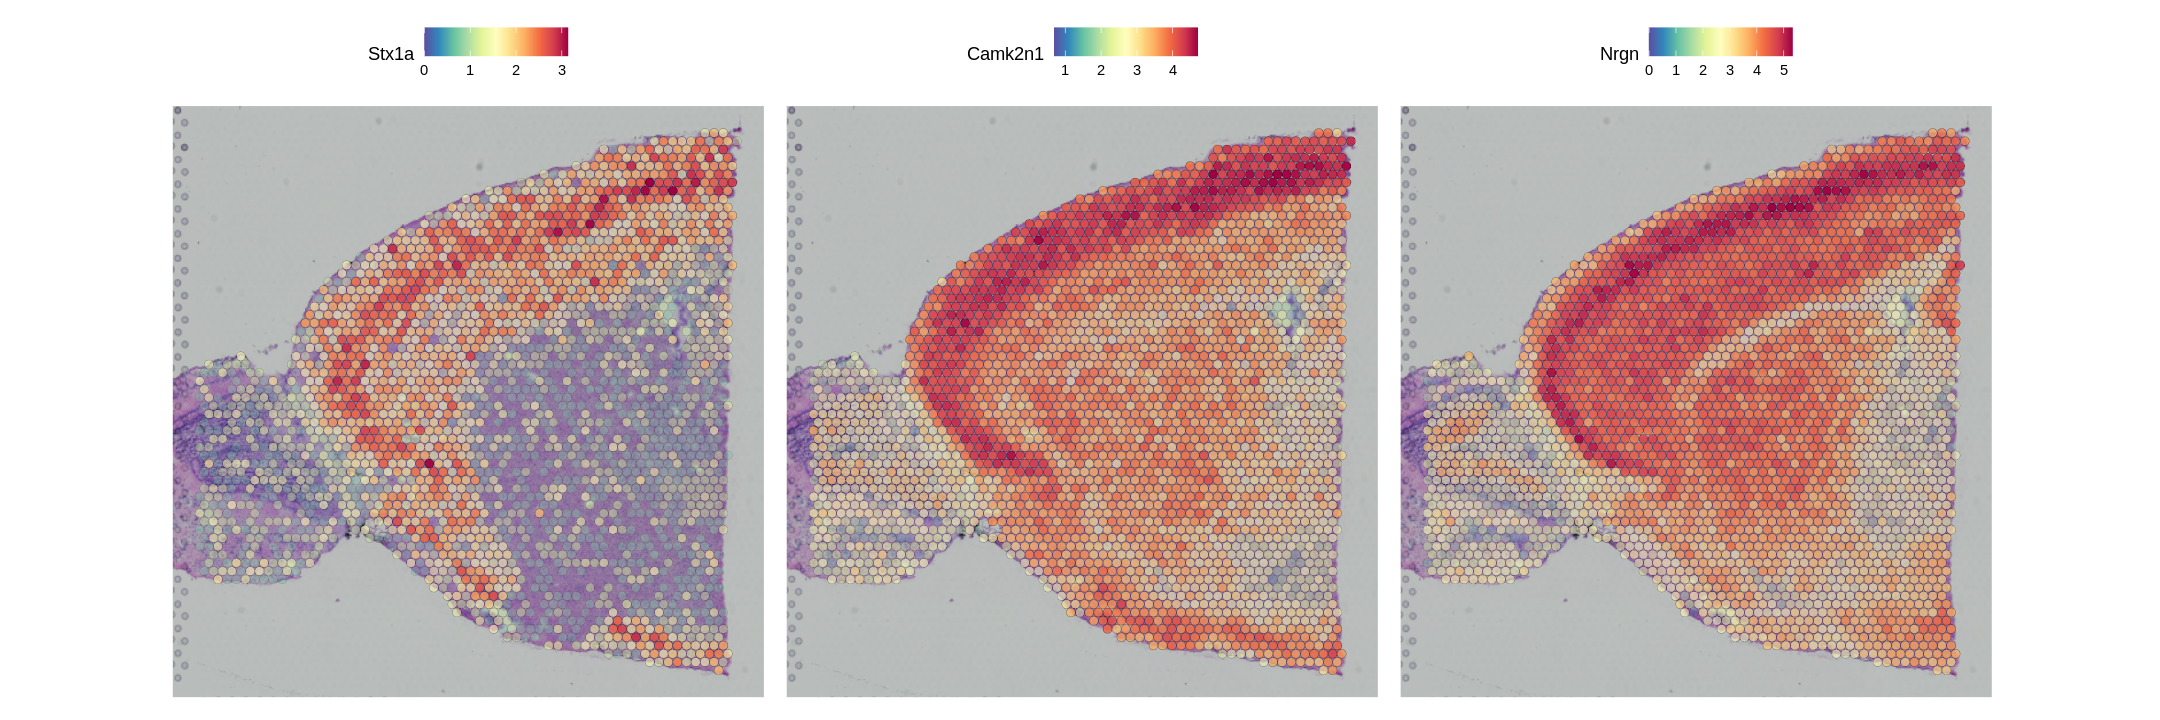

In [23]:
options(repr.plot.width = 18, repr.plot.height = 6)
de_markers <- FindMarkers(brain, ident.1 = 5, ident.2 = 6)
SpatialFeaturePlot(object = brain, features = rownames(de_markers)[1:3], alpha = c(0.1, 1), ncol = 3)

In [27]:
brain <- FindSpatiallyVariableFeatures(brain, assay = "SCT", features = VariableFeatures(brain)[1:1000],
    selection.method = "moransi")

Computing Moran's I



ERROR: ignored

In [9]:
install.packages("ape")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
brain <- FindSpatiallyVariableFeatures(brain, assay = "SCT", features = VariableFeatures(brain)[1:1000],
    selection.method = "moransi")

Computing Moran's I

For a more efficient implementation of the Morans I calculation,
(selection.method = 'moransi') please install the Rfast2 package
--------------------------------------------
install.packages('Rfast2')
--------------------------------------------
After installation of Rfast2, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



In [18]:
top.features <- head(SpatiallyVariableFeatures(brain, method = "moransi"), 6)

ERROR: ignored



---

# 4- Subset out anatomical regions

Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Seurat objects”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


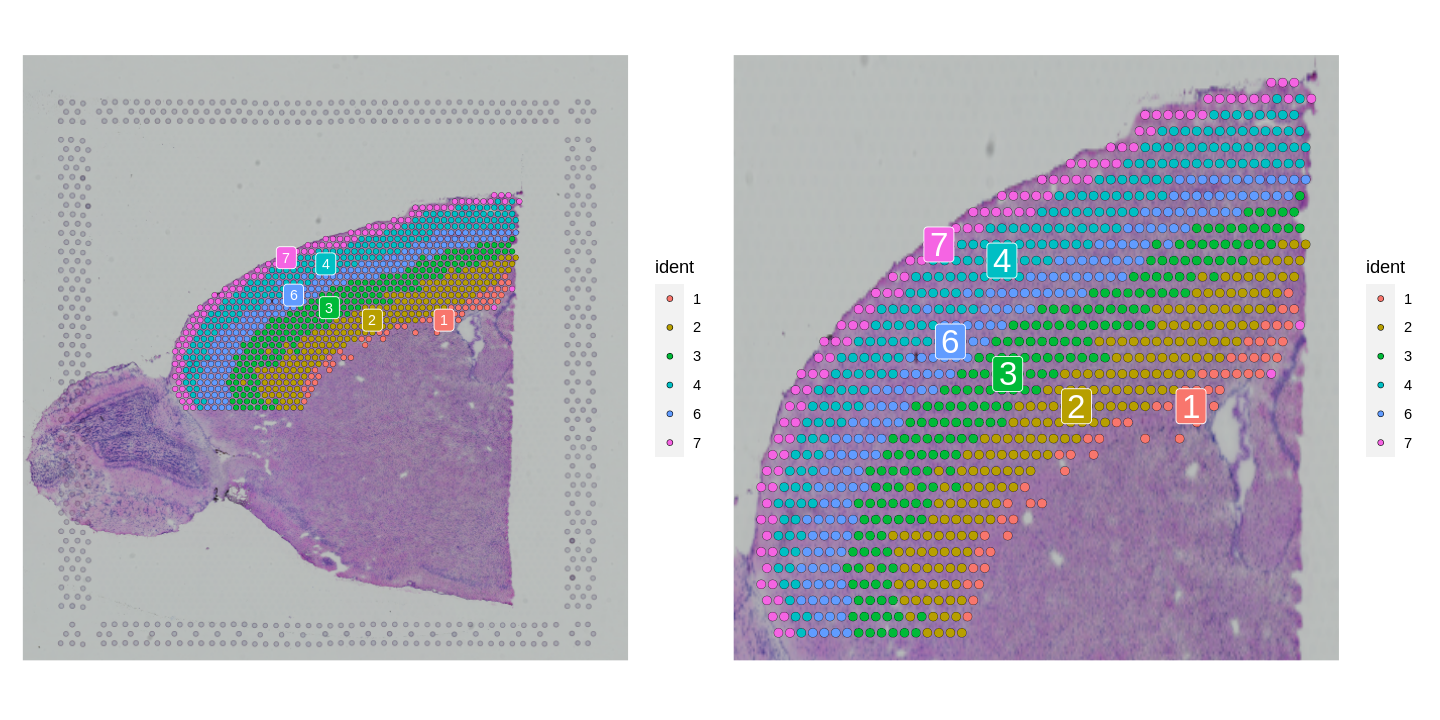

In [24]:
cortex <- subset(brain, idents = c(1, 2, 3, 4, 6, 7))
# now remove additional cells, use SpatialDimPlots to visualize what to remove
cortex <- subset(cortex, anterior1_imagerow > 350 | anterior1_imagecol < 150, invert = TRUE)
cortex <- subset(cortex, anterior1_imagerow > 275 & anterior1_imagecol > 370, invert = TRUE)
cortex <- subset(cortex, anterior1_imagerow > 250 & anterior1_imagecol > 440, invert = TRUE)
options(repr.plot.width = 12, repr.plot.height = 6)
p1 <- SpatialDimPlot(cortex, crop = TRUE, label = TRUE)
p2 <- SpatialDimPlot(cortex, crop = FALSE, label = TRUE, pt.size.factor = 1, label.size = 3)
p2 + p1